In [33]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

from scipy.optimize import minimize
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVC

pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_seq_items', None)
 
#%config InlineBackend.figure_formats = {'pdf',}
%matplotlib inline

import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
[1]


c:\python27\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


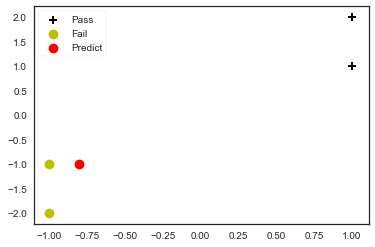

In [34]:
#SVC参数解释 
#（1）C: 目标函数的惩罚系数C，用来平衡分类间隔margin和错分样本的，default C = 1.0； 
#（2）kernel：参数选择有RBF, Linear, Poly, Sigmoid, 默认的是"RBF"; 
#（3）degree：if you choose 'Poly' in param 2, this is effective, degree决定了多项式的最高次幂； 
#（4）gamma：核函数的系数('Poly', 'RBF' and 'Sigmoid'), 默认是gamma = 1 / n_features; 
#（5）coef0：核函数中的独立项，'RBF' and 'Poly'有效； 
#（6）probablity: 可能性估计是否使用(true or false)； 
#（7）shrinking：是否进行启发式； 
#（8）tol（default = 1e - 3）: svm结束标准的精度; 
#（9）cache_size: 制定训练所需要的内存（以MB为单位）； 
#（10）class_weight: 每个类所占据的权重，不同的类设置不同的惩罚参数C, 缺省的话自适应； 
#（11）verbose: 跟多线程有关，不大明白啥意思具体； 
#（12）max_iter: 最大迭代次数，default = 1， if max_iter = -1, no limited; 
#（13）decision_function_shape ： ‘ovo’ 一对一, ‘ovr’ 多对多  or None 无, default=None 
#（14）random_state ：用于概率估计的数据重排时的伪随机数生成器的种子。 
# ps：7,8,9一般不考虑。 

X = np.array([[-1,-1],[-2,-1],[1,1],[2,1]])
y = np.array([1,1,2,2])

neg = y[:] == 1
pos = y[:] == 2
axes = plt.gca()
axes.scatter(X[pos][0],X[pos][1],marker='+',c='k',s=60,linewidth=2,label='Pass')
axes.scatter(X[neg][0],X[neg][1],c='y',s=60,linewidth=2,label='Fail')
#在散点图上输入预测点
axes.scatter(-0.8,-1,c='r',s=60,linewidth=2,label='Predict')
axes.legend(frameon=True, fancybox=True)#绘制散点图

clf = SVC()
clf.fit(X,y)                  #所有分类器都有这些性质
print clf.fit(X,y)            #打印svc训练函数的参数
print clf.predict([-0.8,-1])  #利用分类器训练结果预测输入list形式的特征向量

In [35]:
x = [[0],[1],[2],[3]]
y = [0,1,2,3]
clf = SVC(decision_function_shape='ovo')
clf.fit(X,y)
print clf.fit(X,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [43]:
import numpy as np
X = np.array([[-1, -1], [-2, -1], [1, 1], [2, 1]])
y = np.array([1, 1, 2, 2])
from sklearn.svm import LinearSVC
clf = LinearSVC()
clf.fit(X, y) 
print clf.fit(X,y)
print(clf.predict([[-0.8, -1]]))  

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)
[1]


In [44]:
rng = np.random.RandomState(0)
n_samples_1 = 1000
n_samples_2 = 100
X = np.r_[1.5*rng.randn(n_samples_1,2),0.5*rng.randn(n_samples_2,2)+[2,2]]
#rng.randn(x,y)生成x*y的矩阵，元素都是标准化
#这里先生成1000个[0~1.5]的[a,b]list
#之后生成100个[2~2.5]的[a,b]list排在后面
y = [0]*(n_samples_1)+[1]*(n_samples_2)
print X.shape
print X
print y
#随机生成数据集

(1100, 2)
[[ 2.64607852  0.60023581]
 [ 1.46810698  3.3613398 ]
 [ 2.80133699 -1.46591682]
 ..., 
 [ 1.68550965  2.53503626]
 [ 1.68945865  2.86728609]
 [ 1.45085528  2.28630668]]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

[[ 1.131148    1.19364047]]
[-4.30287226]


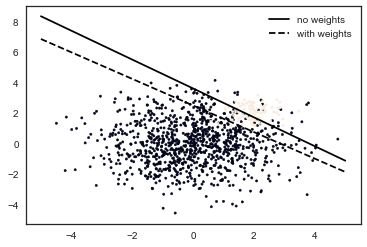

In [49]:
clf = SVC(kernel='linear', C=1.0)  
clf.fit(X, y) 
print clf.coef_
print clf.intercept_ #表示截距
w = clf.coef_[0]    #线性分类器回归方程参数
a = -w[0] / w[1]    #a可以理解为斜率  
xx = np.linspace(-5, 5)  
yy = a * xx - clf.intercept_[0] / w[1]  #二维坐标下的直线方程由Ax+By=C,clf.coef_表示[A,B]，C即为clf.intercept_
h0 = plt.plot(xx, yy, 'k-', label='no weights')  #绘制出回归方程

# get the separating hyperplane using weighted classes  
wclf = SVC(kernel='linear', class_weight={1: 10})  #每个类所占据的权重不同
wclf.fit(X, y)  
  
ww = wclf.coef_[0]  
wa = -ww[0] / ww[1]  
wyy = wa * xx - wclf.intercept_[0] / ww[1]   #带权重的直线  

# plot separating hyperplanes and samples  
h1 = plt.plot(xx, wyy, 'k--', label='with weights') #第三个参数表示直线样式 
plt.scatter(X[:, 0], X[:, 1], c=y,s=5,linewidth=0.5)#散点图，s表示点的大小
plt.legend()  
  
plt.axis('tight')  
plt.show()

In [39]:
from sklearn.svm import SVR
X = [[0, 0], [2, 2]]  
y = [0.5, 2.5]  
rclf = SVR()  
rclf.fit(X, y)     
rclf.predict([[1, 1]])  
#作为分类类别，训练函数将X,y作为向量，在这种情况下y是浮点数

array([ 1.5])

c:\python27\lib\site-packages\ipykernel_launcher.py:17: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.


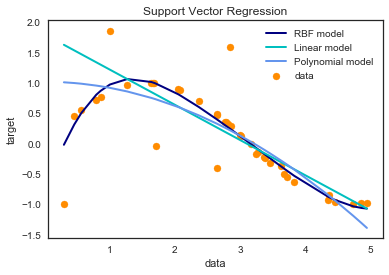

In [40]:
X = np.sort(5 * np.random.rand(40, 1), axis=0)  
#产生40组数据，每组一个数据，axis=0决定按列排列，=1表示行排列  
y = np.sin(X).ravel()   
#np.sin()输出的是列，和X对应，ravel表示转换成行 
y[::5] += 3 * (0.5 - np.random.rand(8)) #随机处理 

svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)  
svr_lin = SVR(kernel='linear', C=1e3)  
svr_poly = SVR(kernel='poly', C=1e3, degree=2)  
y_rbf = svr_rbf.fit(X, y).predict(X)  
y_lin = svr_lin.fit(X, y).predict(X)  
y_poly = svr_poly.fit(X, y).predict(X)  

#可视化
lw = 2  
plt.scatter(X, y, color='darkorange', label='data')  
plt.hold('on')  
plt.plot(X, y_rbf, color='navy', lw=lw, label='RBF model')  
plt.plot(X, y_lin, color='c', lw=lw, label='Linear model')  
plt.plot(X, y_poly, color='cornflowerblue', lw=lw, label='Polynomial model')  
plt.xlabel('data')  
plt.ylabel('target')  
plt.title('Support Vector Regression')  
plt.legend()  
plt.show()